In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import numpy as np 

In [25]:
import seaborn as sns

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [6]:
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

In [8]:
# summarize class distribution
print(Counter(y))

Counter({0: 9900, 1: 100})


In [9]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [10]:
X_over, y_over = oversample.fit_resample(X, y)

In [11]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 9900})


In [12]:
oversample_50 = RandomOverSampler(sampling_strategy=0.5)

In [16]:
X_over_50, y_over_50 = oversample_50.fit_resample(X, y)

In [17]:
print(Counter(y_over_50))

Counter({0: 9900, 1: 4950})


In [22]:
df = pd.DataFrame(
np.random.rand(100,3), columns = [f"f_{i}" for i in range(1,4)]

)

In [35]:
df = pd.read_csv("../Data/df_valid_fashion.csv")

In [36]:
df.columns

Index(['Label', 'Size', 'Overall_fit', 'Rented_for', 'Size_usually_worn',
       'Height', 'Age', 'Bust_size', 'Body_type', 'Weight', 'Rating', 'Date',
       'Rent_price', 'Product_details', 'Number_of_reviews', 'Sleeves',
       'Neckline', 'Dress_Style', 'BMI'],
      dtype='object')

In [37]:
num_columns = ['Height', 'Age','Weight','Number_of_reviews','Rent_price']
for column in num_columns: 
    df[f"{column}_binned"] = pd.qcut(x = df[column], q = 10, labels=False, retbins=False, precision=3, duplicates='drop')

In [40]:
df.head()

,Label,Size,Overall_fit,Rented_for,Size_usually_worn,Height,Age,Bust_size,Body_type,Weight,Rating,Date,Rent_price,Product_details,Number_of_reviews,Sleeves,Neckline,Dress_Style,BMI,Height_binned,Age_binned,Weight_binned,Number_of_reviews_binned,Rent_price_binned
0,unknown,2,unknown,Wedding,2,64,28,34C,athletic,140,0,fall,41,gown. cap sleeves. off the shoulder neckline. ...,274,cap_sleeves,off_shoulder,gown,24.028320,2,0,4,9,1
1,TOP CONTRIBUTOR,unknown,unknown,Wedding,4,67,36,34A,athletic,135,0,summer,41,gown. sleeveless. v- neckline. hidden back zip...,152,sleeveless,v_neckline,gown,21.141680,5,4,3,8,1
2,TOP CONTRIBUTOR,6,unknown,Wedding,6,65,58,36D,fullbust,147,0,fall,57,three quarter sleeves. crew neckline. high low...,178,three_quarter_sleeves,crew_neckline,other,24.459408,3,9,6,9,3
3,TOP CONTRIBUTOR,2,Overall fit: True to Size,Date,2,64,39,32B,petite,125,0,winter,44,sheath. long sleeves. v-neckline. hidden back ...,64,long_sleeves,v_neckline,sheath,21.453857,2,5,1,5,2
4,TOP CONTRIBUTOR,M,Overall fit: Small,Party,6,67,31,30G,hourglass,135,0,summer,30,sheath. sleeveless. crew neckline. elastic wai...,28,sleeveless,crew_neckline,sheath,21.141680,5,2,3,1,0


In [27]:
df["f_bin_10"] = pd.cut(df["f_1"],bins=10,labels=False)

In [31]:
df["f_percentiles"]= pd.qcut(x = df["f_1"], q = 10, labels=False, retbins=False, precision=3, duplicates='raise')

In [33]:
df["f_percentiles"].value_counts()

5    10
3    10
9    10
6    10
4    10
8    10
0    10
1    10
2    10
7    10
Name: f_percentiles, dtype: int64

In [32]:
df.head()

,f_1,f_2,f_3,f_bin_10,f_percentiles
0,0.445205,0.868333,0.625751,4,5
1,0.350947,0.708522,0.485793,3,3
2,0.952137,0.040405,0.183195,9,9
3,0.254967,0.532493,0.951965,2,3
4,0.600930,0.882011,0.987029,6,6


<AxesSubplot:xlabel='f_1', ylabel='Count'>

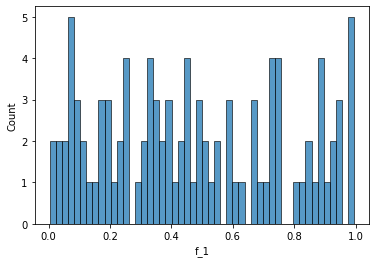

In [26]:
sns.histplot(data=df, x="f_1",bins=50)